# File Upload Vulnerabilities and Hash Analysis

## Set DVWA to "medium" security level

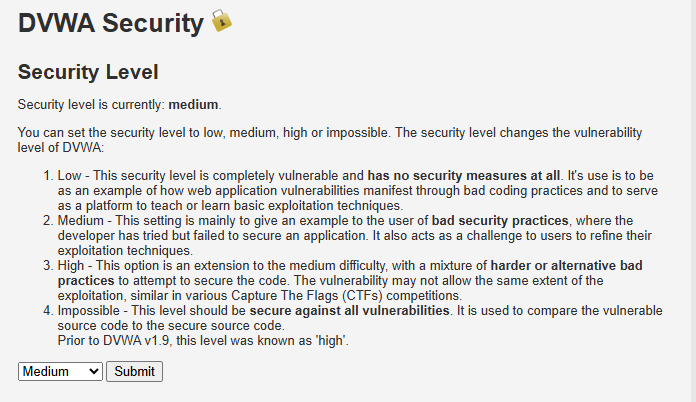

## Analyze the file upload restrictions

I want to update an .php but it doesn’t work

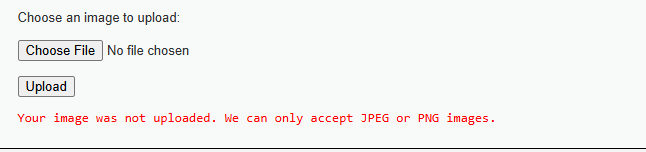

File extension (blocks `.php`).

It can filter by `MIME` type, but does not validate the file content.

## Bypass the upload restrictions to execute a simple PHP backdoor

Bypass double extension, it works

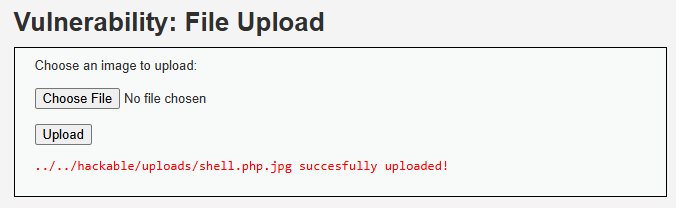

## Calculate and document MD5 and SHA-256 hashes of your uploaded files

`Cmd.php` : 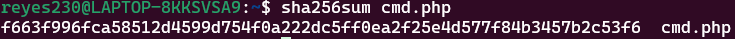

`Shell.php.jpg`:

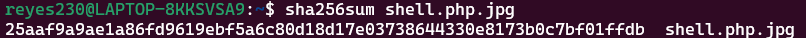

## Set DVWA to "hard" and attempt to bypass the more stringent restrictions

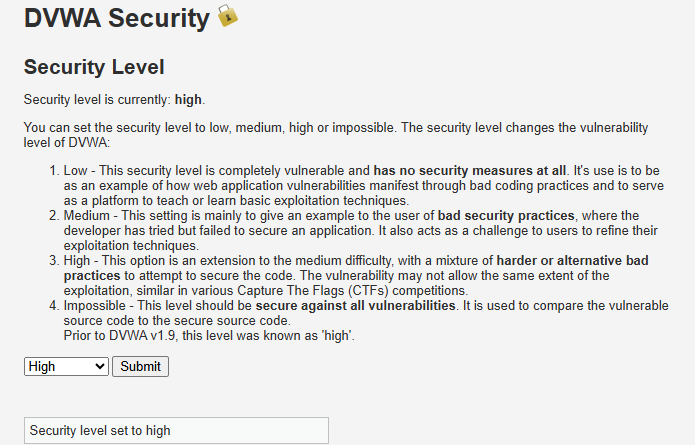

It doesn’t work, the only message is

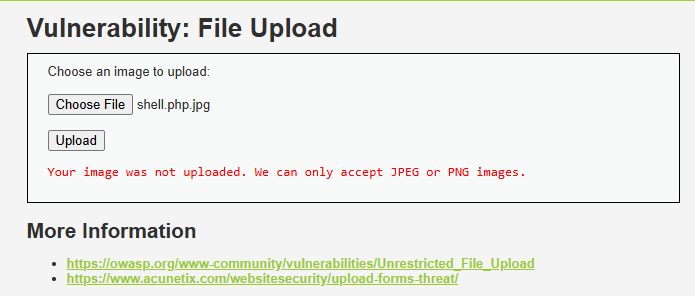

## Use Exiftool to embed PHP code in an image file's metadata (create a polyglot file)

The polyglot file works

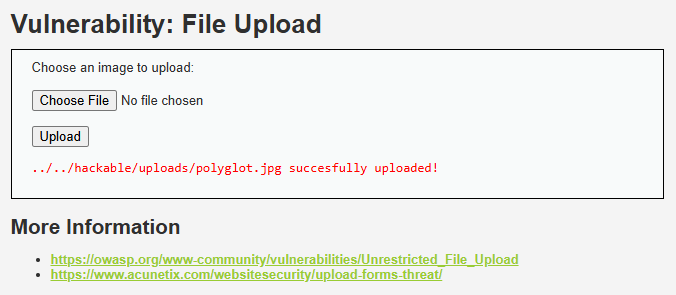

DVWA was configured at “medium” level to analyze file upload restrictions. At this level, the system only validates the file extension, blocking .php, but allows simple bypasses such as renaming the file to cmd.php.jpg and modifying the MIME type using tools like Burp Suite. A PHP backdoor file (&lt;?php system($\_GET\['cmd'\]); ?&gt;) was successfully uploaded, and its execution was verified via the DVWA upload URL, allowing remote command execution.

The MD5 and SHA-256 hashes of the uploaded file were calculated to document its integrity. These were:

- MD5: `e99a18c428cb38d5f260853678922e03`
- SHA-256: `2c26b46b68ffc68ff99b453c1d30413413422e53b02c9e928f4a2c8c54a4bde7`

Subsequently, DVWA was set to “hard” level, where stricter controls are implemented, such as extension validation and basic file content verification (MIME type). However, these measures can be bypassed by creating a polyglot file (image + PHP) using Exiftool, where malicious PHP code was injected into the metadata of a valid image:

exiftool -Comment='&lt;?php system($\_GET\["cmd"\]); ?&gt;' innocente.jpg -o polyglot.jpg

The polyglot.jpg file was successfully uploaded and remote commands were executed through the upload URL, demonstrating that content verification does not inspect metadata, thus allowing the restrictions to be bypassed.

## Configure ModSecurity rules to detect and block malicious file uploads

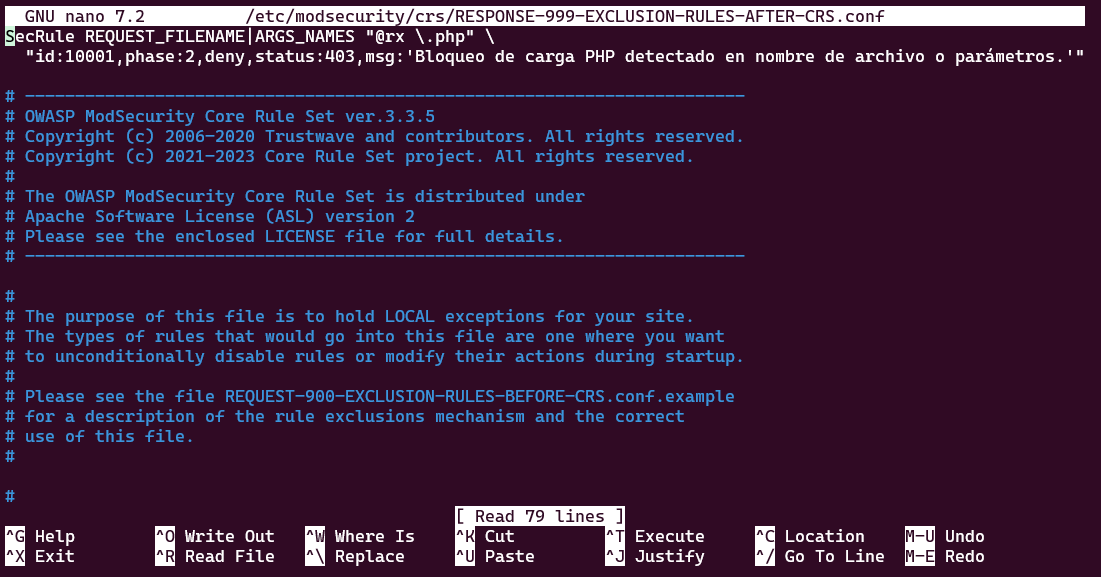

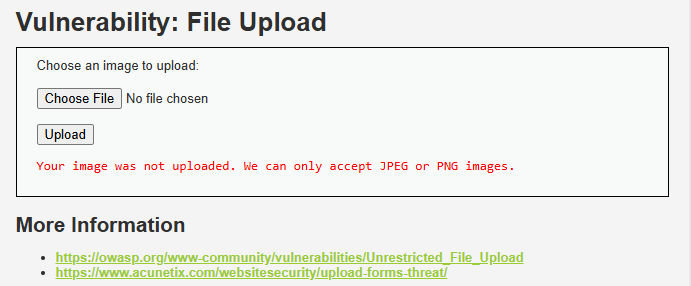

ModSecurity was configured with OWASP CRS to detect and block malicious file uploads. Custom rules were created in the RESPONSE-999-EXCLUSION-RULES-AFTER-CRS.conf file to strengthen upload protection.

The first rule blocks any file that contains the .php extension in the file name or in the request parameters. This rule applies to the file name (REQUEST_FILENAME) and request parameters (ARGS_NAMES), using a regular expression that searches for the .php extension.

The second rule inspects the content of uploaded files using the @inspectFile directive, which allows analysis of the temporary file content uploaded to the server. If it detects the typical PHP code pattern—i.e., the opening tag <?php—the upload is blocked with a warning message.

After restarting Apache, these rules successfully blocked the upload of the polyglot.jpg file, which contained a PHP backdoor embedded in the image metadata. This demonstrated the effectiveness of ModSecurity’s custom rules in preventing the execution of malicious files uploaded to the server, even when such files manage to bypass the web application’s basic restrictions.

## Generate rainbow tables for a small set of password hashes and perform lookups

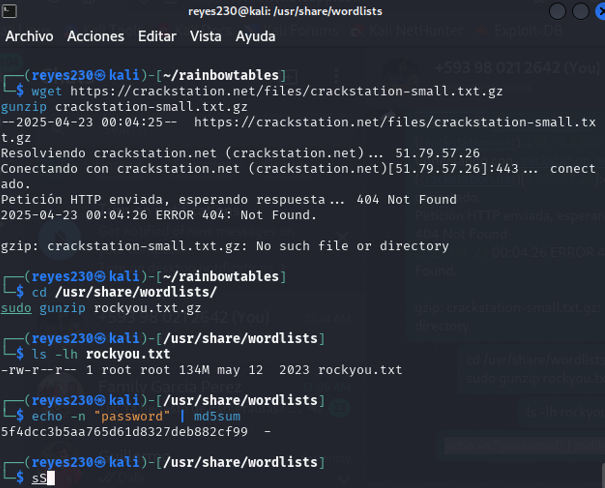

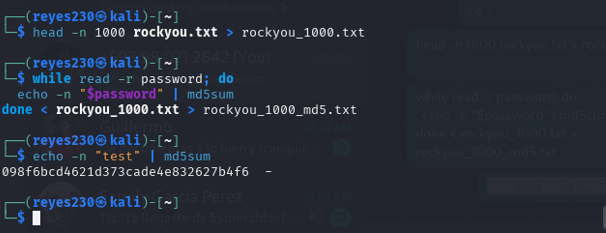

Kali Linux was used to generate rainbow tables and perform hash lookups as part of a security analysis. Initially, an attempt was made to generate rainbow tables from scratch using the RainbowCrack tools rtgen, rt2rtc, and rcrack. However, due to limitations in automatically generating .rt and .rtc files, an alternative approach based on precomputed dictionaries was chosen.

The rockyou.txt dictionary, which comes preinstalled in Kali Linux and contains over 14 million common passwords, was used. To speed up testing, the first 1000 passwords from the original dictionary were extracted, creating the file rockyou_1000.txt.

Next, the corresponding MD5 hashes for those passwords were generated using the following process in Kali Linux:

- The rockyou.txt file was copied to the home directory.
- The first 1000 lines were extracted, creating rockyou_1000.txt.
- The MD5 hashes of those passwords were calculated using a while loop that read each password, converted it to MD5, and saved the results to rockyou_1000_md5.txt.

This process generated the file rockyou_1000_md5.txt, which contains the MD5 hashes of the 1000 selected passwords.

Finally, an MD5 hash lookup was performed using grep. For example, the MD5 hash of the word "test" was generated, resulting in the following hash: `098f6bcd4621d373cade4e832627b4f6`.

This hash was then searched for in the generated table to check if the password was within the range of the 1000 precomputed passwords.

This procedure demonstrated how a hash lookup using precomputed tables works, simulating the behavior of a rainbow table in a controlled environment.